In [1]:
library(DescTools)
library(ggplot2)
library(readr)
suppressWarnings(library(dplyr))
library(visNetwork)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Warning message:
"package 'visNetwork' was built under R version 3.4.1"

In [18]:
data <- read_csv('OAX.csv')
data$value <- data$value / 10**18
data$timeStamp <- as.POSIXct(data$timeStamp,origin="1970-01-01",tz="GMT")
data <- data[data$value > 0,] #odstranim transakcije, kjer je value 0
head(data)

Parsed with column specification:
cols(
  blockNumber = col_integer(),
  timeStamp = col_integer(),
  from = col_character(),
  to = col_character(),
  value = col_double()
)


blockNumber,timeStamp,from,to,value
3913144,2017-06-22 13:00:26,0x8a53ee33d77371bacdc76cae6632c23495f669d7,0x701c244b988a513c945973defa05de933b23fe1d,1.0000000
3913144,2017-06-22 13:00:26,0xa6bc6b41fc360364af6c2138ad9f1e4005523532,0x701c244b988a513c945973defa05de933b23fe1d,2.0000000
3913144,2017-06-22 13:00:26,0x3b150851de69e672ec79a60a3df4663985496e14,0x701c244b988a513c945973defa05de933b23fe1d,1.0000000
3913145,2017-06-22 13:00:30,0x6732f7bec0e6ce62f7edfcd7448cfb2947e6526b,0x701c244b988a513c945973defa05de933b23fe1d,0.9898319
3913146,2017-06-22 13:00:37,0x03474b39c921adbfaa80aad93a3069b5cd2f7958,0x701c244b988a513c945973defa05de933b23fe1d,0.9500000
3913146,2017-06-22 13:00:37,0x9db5b9e37d8e8827f5f49839821cb16db555d5f6,0x701c244b988a513c945973defa05de933b23fe1d,2.1000000


In [19]:
n <- dim(data)[1]
data <- data[1:(n-3),]
n

[1] 5097

In [20]:
tail(data)

blockNumber,timeStamp,from,to,value
3973606,2017-07-04 15:51:07,0x957586da2f235bb062dcdae2b4fb17c4d29f111b,0x701c244b988a513c945973defa05de933b23fe1d,0.07219663
3973909,2017-07-04 17:18:06,0x957586da2f235bb062dcdae2b4fb17c4d29f111b,0x701c244b988a513c945973defa05de933b23fe1d,0.06619663
3973937,2017-07-04 17:24:19,0x957586da2f235bb062dcdae2b4fb17c4d29f111b,0x701c244b988a513c945973defa05de933b23fe1d,0.06367663
3973996,2017-07-04 17:37:54,0x957586da2f235bb062dcdae2b4fb17c4d29f111b,0x701c244b988a513c945973defa05de933b23fe1d,0.05100000
3977586,2017-07-05 11:01:24,0x957586da2f235bb062dcdae2b4fb17c4d29f111b,0x701c244b988a513c945973defa05de933b23fe1d,0.03900000
3977711,2017-07-05 11:37:38,0x957586da2f235bb062dcdae2b4fb17c4d29f111b,0x701c244b988a513c945973defa05de933b23fe1d,0.02700000


In [21]:
sum(data$value)

[1] 27447.5

https://medium.com/@OAX_Foundation/the-openanx-token-sale-has-officially-closed-41a473512d0f

https://medium.com/@OAX_Foundation

In [36]:
mean(data$value)

[1] 5.388203

In [22]:
length(unique(data$from))

[1] 3739

In [23]:
tmp <- split(data, cut(strptime(data$timeStamp, format="%F %R"),"day"))
length(tmp)

[1] 14

In [25]:
tmp <- split(data, cut(strptime(data$timeStamp, format="%F %R"),"day"))
df <- data.frame(Date=as.Date(as.character()), sum=numeric(),count=numeric(), stringsAsFactors=FALSE)
for (i in c(1:14)) {
    day <- tmp[[i]]
    vec <- c(day$timeStamp[[1]], sum(day$value),length(day$value))
    df <- rbind(df, vec)
    }
colnames(df)<- c("date", "sum", "count")
df$date <- as.POSIXct(df$date,origin="1970-01-01",tz="GMT")
df$date <- as.Date(df$date)
df$total <- cumsum(df$sum)
df

date,sum,count,total
2017-06-22,16405.0637,2339,16405.06
2017-06-23,3307.0482,785,19712.11
2017-06-24,1090.1163,297,20802.23
2017-06-25,1443.4902,308,22245.72
2017-06-26,755.1073,226,23000.83
2017-06-27,534.7403,165,23535.57
2017-06-28,217.9107,98,23753.48
2017-06-29,230.3146,108,23983.79
2017-06-30,233.9607,148,24217.75
2017-07-01,241.4004,75,24459.15


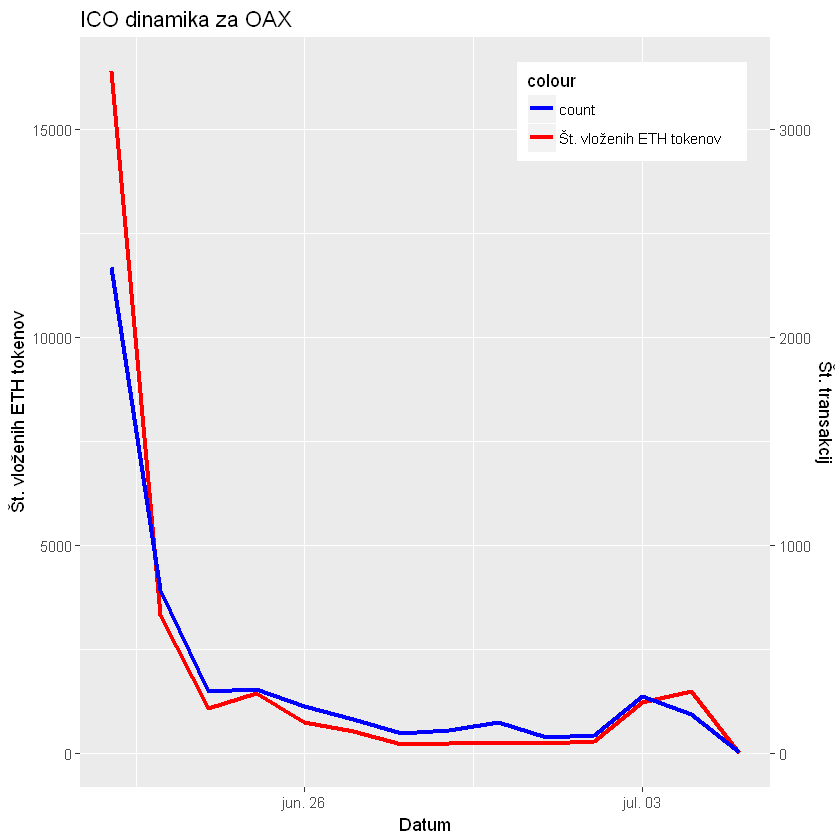

In [26]:
p <- ggplot(df, aes(x = date)) + geom_line(aes(y = sum, colour = "Št. vloženih ETH tokenov"),size=1.2) + 
    geom_line(aes(y = count*5, colour = "count"), size=1.2) + 
    scale_y_continuous(sec.axis = sec_axis(~./5, name = "Št. transakcij")) + 
    scale_colour_manual(values = c("blue", "red")) + labs(y = "Št. vloženih ETH tokenov", x = "Datum") + 
    theme(legend.position = c(0.8, 0.9)) + ggtitle('ICO dinamika za OAX ')
p

In [32]:
data['class'] <- data['value'] %/% 0.1
data['class'] <- data['class'] / 10
vecina <- data[data$value <= 2, ]
other <- nrow(data[data$value > 2, ])
vecina$class <- as.character(vecina$class)
velikost <- vecina %>% select(blockNumber, class) %>% group_by(class) %>% summarise(st_transakcij = length(blockNumber))
velikost$class <- as.numeric(velikost$class)
velikost$bucket <- rep(0, nrow(velikost))
for (i in c(1:nrow(velikost))) {
    tmp <- paste(velikost$class[[i]],'-',velikost$class[[i]]+0.1,sep=' ')
    velikost$bucket[[i]] <- tmp
}
velikost$delez_v_procentih <-round((velikost$st_transakcij / 3792)*100,1)
#tele spodnje tri vrstice zakomentiraj, če želiš 'pognati' graf
velikost$class <- NULL
velikost <- velikost[,c('bucket', 'st_transakcij', 'delez_v_procentih')]
velikost

bucket,st_transakcij,delez_v_procentih
0 - 0.1,382,10.1
0.1 - 0.2,379,10.0
0.2 - 0.3,300,7.9
0.3 - 0.4,111,2.9
0.4 - 0.5,156,4.1
0.5 - 0.6,322,8.5
0.6 - 0.7,53,1.4
0.7 - 0.8,27,0.7
0.8 - 0.9,55,1.5
0.9 - 1,161,4.2


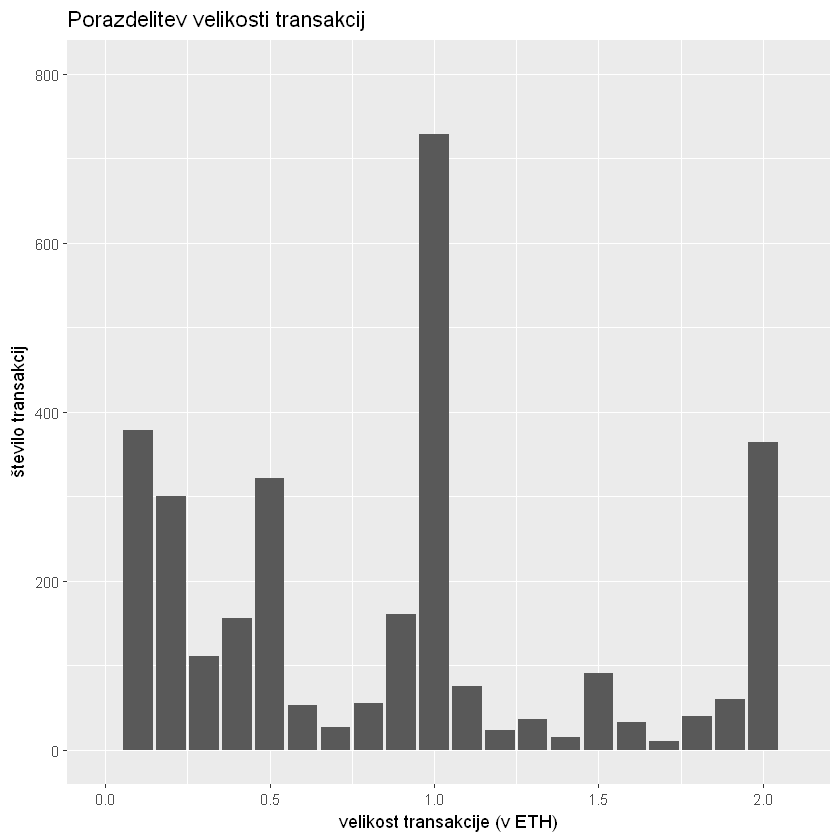

In [31]:
graf <- ggplot(data = velikost, mapping = aes(x = class, y = st_transakcij)) + geom_col() +
        labs(x = "velikost transakcije (v ETH)", y = "število transakcij") + xlim(-0.01, 2.1) + ylim(0, 800) + 
        ggtitle('Porazdelitev velikosti transakcij')
graf

In [34]:
other

[1] 1669

In [35]:
data['class'] <- data['value'] %/% 10
data['class'] <- data['class'] * 10
ostali <- data[data$value > 2, ]
ostali$class <- as.character(ostali$class)
velikost <- ostali %>% select(blockNumber, class) %>% group_by(class) %>% summarise(st_transakcij = length(blockNumber))
velikost$class <- as.numeric(velikost$class)
velikost$bucket <- rep(0, nrow(velikost))
for (i in c(1:nrow(velikost))) {
    tmp <- paste(velikost$class[[i]],'-',velikost$class[[i]]+10,sep=' ')
    velikost$bucket[[i]] <- tmp
}
velikost <- velikost[with(velikost, order(class)), ]
velikost$bucket[[1]] <- ('2.1 - 10')
velikost$delez_v_procentih <-round((velikost$st_transakcij / 3792)*100,1)
velikost$class <- NULL
velikost <- velikost[,c('bucket', 'st_transakcij', 'delez_v_procentih')]
velikost

bucket,st_transakcij,delez_v_procentih
2.1 - 10,1117,29.5
10 - 20,292,7.7
20 - 30,106,2.8
30 - 40,47,1.2
40 - 50,29,0.8
50 - 60,23,0.6
60 - 70,9,0.2
70 - 80,4,0.1
80 - 90,3,0.1
90 - 100,2,0.1


In [33]:
whales <- data[with(data, order(-value)), ]
whales <- whales[, c('timeStamp', 'from', 'value')]
head(whales, n=10)

timeStamp,from,value
2017-06-22 13:02:01,0x49a408f1ee8951c509db64be3cd47a0faf81d2a6,1000.0000
2017-06-22 13:02:41,0x0342d1a7e22baa5410ee8c72873e7a67c7b20c77,700.0000
2017-06-22 20:44:59,0x75c8e2dd57927eb0373e8e201ebf582406adcf45,600.0000
2017-06-23 06:00:46,0x09b8b644fbfc6ee8e5dd0f450a030e5f381a5cfa,498.9889
2017-06-22 13:57:20,0xb7f1498898d70685851b5331f64bf26215f00415,490.0000
2017-06-22 13:06:01,0x88e4c34f2d290d32761bcd68e874e018d3355d4a,423.0000
2017-06-22 13:00:50,0x7b5e7fa8e19db6f3488d064c5f0ae519f439a643,400.0000
2017-06-22 13:14:27,0x7b5e7fa8e19db6f3488d064c5f0ae519f439a643,400.0000
2017-07-03 02:37:56,0xa93e901c15586a2477cc50df0fe6f9f5091301a3,360.0000
2017-06-23 16:29:37,0x3eebfc3a6a03b4114013be679cfe36099dfad29b,300.0000
